## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
%matplotlib inline 

# 1) Is the distribution of body temperatures normal?
Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
Let's see what data do we have

In [2]:
df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [4]:
df.shape

(130, 3)

In [6]:
df.temperature.describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

In [19]:
df.temperature.value_counts().nlargest(n=5)

98.0    11
98.8    10
98.2    10
98.6    10
98.4     9
Name: temperature, dtype: int64

In [22]:
import numpy as np

df_temp_mean = np.mean(df.temperature)
df_temp_sd = np.std(df.temperature)
temperatures = df.temperature.values
print(df_temp_mean, df_temp_sd)

98.24923076923078 0.7303577789050377


In [23]:
print('Proportion of values within one standard deviation of the mean:',
      len(temperatures[(temperatures>df_temp_mean-df_temp_sd) & (temperatures<df_temp_mean+df_temp_sd)])/len(temperatures))

print('Proportion of values within two standard deviations of the mean:',
      len(temperatures[(temperatures>df_temp_mean-2*df_temp_sd) & (temperatures<df_temp_mean+2*df_temp_sd)])/len(temperatures))

print('Proportion of values within three standard deviations of the mean:',
      len(temperatures[(temperatures>df_temp_mean-3*df_temp_sd) & (temperatures<df_temp_mean+3*df_temp_sd)])/len(temperatures))

Proportion of values within one standard deviation of the mean: 0.6923076923076923
Proportion of values within two standard deviations of the mean: 0.9461538461538461
Proportion of values within three standard deviations of the mean: 0.9923076923076923


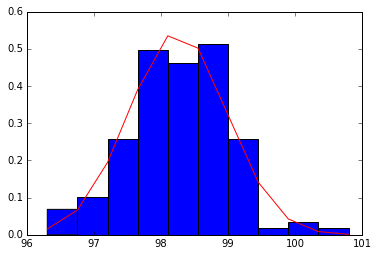

In [7]:
n, bins, patches = plt.hist(df.temperature, 10, normed=1)
mu = np.mean(df.temperature)
sigma = np.std(df.temperature)
plt.plot(bins, mlab.normpdf(bins, mu, sigma),color='r')

In [8]:
import scipy.stats as stats
x=df.temperature
stats.normaltest(x)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

As the p-value is 0.25 we can not reject the null hypothesis (the distribution is normal). Then we conclude that the body temperature is normal distributed.

# Is the true population mean really 98.6 degrees F?
Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?

In here our null hypothesis is that mean is equal to 98.6 while the alternative says the contrary:

* H0: population mean = 98.6

* HA: population mean not equal to 98.6

Let's check the conditions for using the CLT on this sample:

Independece: The sample observations are independents
    * They have been randombly selected
    * Sampling without replacement n<10%
Sample size/skew: n>30

Population SD is not known.

And as stated above:
$\alpha = .05$

Since the number of data point is more than 30, I can use a z-test. I'll utilize statsmodels to do the calculation.

In [17]:
from statsmodels.stats.weightstats import ztest
ztest(df.temperature,value=98.6)

(-5.4548232923645195, 4.9021570141012155e-08)

The p-value--the second value of the tuple--is miniscule. In light of this, I reject the null hypothesis that the true population mean is 98.6 degrees Fahrenheit.

What if I did a t-test? Let's see.

In [18]:
stats.ttest_1samp(df.temperature,98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

I'd still reject the null hypothesis.

# At what temperature should we consider someone's temperature to be "abnormal"?

A 95% confidence interval would be good. The margin of error, M.E, is given by:
M.E = critical value x standard error.

The critical value is 1.96 for a 95% confidence interval and the standard error, S.E, is:
$S.E = \frac{sample \quad standard \quad deviation}{\sqrt{n}}$

In [24]:
se = df_temp_sd/np.sqrt(len(df))
me = 1.96*se
confidence_interval = [df_temp_mean-me,df_temp_mean+me]
confidence_interval

[98.123679804428193, 98.374781734033363]

The endpoints of the interval are the same up to four decimal places. If someone's temperature goes out of these bounds, it would be classified as "abnormal".

In [25]:
Is there a significant difference between males and females in normal temperature?


Object `temperature` not found.


# Is there a significant difference between males and females in normal temperature

We need to do a two sample hypothesis test.

In [27]:
female_temps = np.array(df.temperature[df.gender=='F']) #previously got values and cast to list
male_temps = np.array(df.temperature[df.gender=='M'])

print(len(male_temps))
print(len(female_temps))

65
65


The samples are still large enough to use a z-test. However, I think I'll use a t-test this time. This decision is justifiable since the population standard deviation is unknown.

In [28]:
stats.ttest_ind(female_temps,male_temps)

Ttest_indResult(statistic=2.2854345381656103, pvalue=0.023931883122395609)

With that p-value I will reject the null hypothesis. There is a significant difference between the normal temperature of males and females.